In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, wilcoxon
from numpy import mean
from numpy import std

In [2]:
df = pd.read_csv("/home/colombelli/Documents/misc/ihc/trab/nasa.csv")
df

,Timestamp,Qual a sua idade?,Qual o seu gênero?,Qual a sua escolaridade?,QR – Quanta demanda mental foi necessária?,QR – Quanta demanda física foi necessária?,QR – Quão satisfeito tu te sentiste com a tua performance?,QR – Quão difícil foi a tarefa?,QR – O quão frustrante foi a tarefa?,QR – Quanto tempo durou a tarefa?,...,APP – Quanta demanda mental foi necessária?,APP – Quanta demanda física foi necessária?,APP – Quão satisfeito tu te sentiste com a tua performance?,APP – Quão difícil foi a tarefa?,APP – O quão frustrante foi a tarefa?,MAN – Quanta demanda mental foi necessária?,MAN – Quanta demanda física foi necessária?,MAN – Quão satisfeito tu te sentiste com a tua performance?,MAN – Quão difícil foi a tarefa?,MAN – O quão frustrante foi a tarefa?
0,7/18/2020 18:09:52,50,Feminino,Ensino Superior completo,1,1,10,1,1,23.86,...,1,1,10,2,1,8,10,2,5,10
1,7/18/2020 18:50:05,57,Masculino,Ensino Médio completo,1,1,10,1,1,69.00,...,1,1,10,1,1,4,2,8,2,3
2,7/18/2020 19:26:18,53,Feminino,Ensino Superior completo,2,1,10,1,1,35.00,...,1,1,2,1,1,10,10,1,9,10
3,7/18/2020 20:15:44,29,Feminino,Ensino Superior completo,1,1,10,1,1,40.00,...,1,1,10,1,1,10,10,2,10,10
4,7/18/2020 20:25:32,30,Masculino,Ensino Superior completo,3,2,9,2,2,47.00,...,1,1,10,1,1,8,10,6,7,10
5,7/18/2020 20:47:40,57,Feminino,Ensino Médio completo,7,3,6,3,4,101.55,...,1,1,9,1,1,7,7,9,3,8
6,7/18/2020 22:49:35,56,Masculino,Ensino Superior completo,1,1,9,1,2,87.86,...,1,1,7,2,2,3,5,8,3,3
7,7/19/2020 16:01:41,28,Feminino,Ensino Superior completo,2,1,10,1,2,62.30,...,3,1,9,2,1,5,2,7,6,9
8,7/19/2020 16:28:03,30,Feminino,Ensino Superior completo,2,1,10,1,1,60.50,...,3,1,9,1,1,4,2,7,4,7


In [22]:
X = df.replace("Feminino", 0).replace("Masculino", 1).replace("Ensino Superior completo", 0).replace("Ensino Médio completo", 1).iloc[:, 1:]

In [23]:
pca.fit(X)
X_pca = pca.transform(X)

In [24]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [17]:
from sklearn.decomposition import PCA

array([[-72.6329873 ,  -6.79051459],
       [ 29.84008823,  -3.22498826],
       [-35.95523268,   1.15955883],
       [  7.14239362,  31.38776709],
       [ -0.35524749,  18.85578179],
       [ 86.38688155,  -3.33912481],
       [ 24.31250651, -23.83083762],
       [-15.00906987,  -4.85142807],
       [-23.72933256,  -9.36621437]])

In [25]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)
projected

array([[-72.6329873 ,  -6.79051459],
       [ 29.84008823,  -3.22498826],
       [-35.95523268,   1.15955883],
       [  7.14239362,  31.38776709],
       [ -0.35524749,  18.85578179],
       [ 86.38688155,  -3.33912481],
       [ 24.31250651, -23.83083762],
       [-15.00906987,  -4.85142807],
       [-23.72933256,  -9.36621437]])

In [18]:
print(pca.explained_variance_ratio_)

[0.8171     0.10438132]


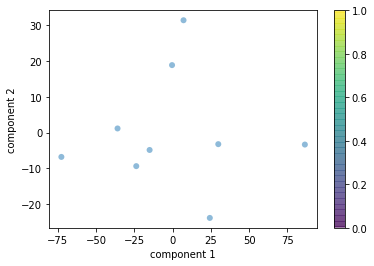

In [26]:
plt.scatter(projected[:, 0], projected[:, 1],
            edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [33]:
X = X.to_numpy()

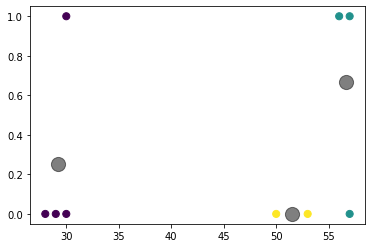

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

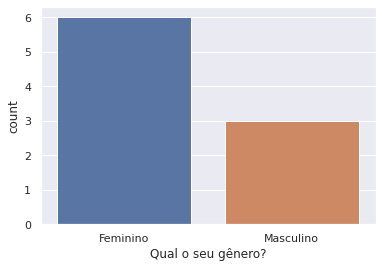

In [10]:
path = "/home/colombelli/Documents/misc/ihc/trab/"
sns.set(style="darkgrid")
sns.countplot(x="Qual o seu gênero?", data=df)
plt.savefig(path+"genero.png")

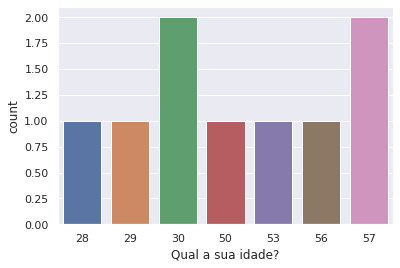

In [11]:
sns.countplot(x="Qual a sua idade?", data=df)
plt.savefig(path+"idade_count.png")

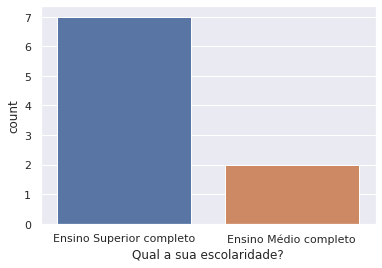

In [12]:
sns.countplot(x="Qual a sua escolaridade?", data=df)
plt.savefig(path+"escolaridade.png")

In [14]:
group_age = []
for row in df['Qual a sua idade?']:
    if row >= 50:
        group_age.append('50 ~ 57')
    else:
        group_age.append('28 ~ 30')

group_age

['50 ~ 57',
 '50 ~ 57',
 '50 ~ 57',
 '28 ~ 30',
 '28 ~ 30',
 '50 ~ 57',
 '50 ~ 57',
 '28 ~ 30',
 '28 ~ 30']

In [15]:
df['Idade agrupada'] = group_age
df

,Timestamp,Qual a sua idade?,Qual o seu gênero?,Qual a sua escolaridade?,QR – Quanta demanda mental foi necessária?,QR – Quanta demanda física foi necessária?,QR – Quão satisfeito tu te sentiste com a tua performance?,QR – Quão difícil foi a tarefa?,QR – O quão frustrante foi a tarefa?,QR – Quanto tempo durou a tarefa?,...,APP – Quanta demanda física foi necessária?,APP – Quão satisfeito tu te sentiste com a tua performance?,APP – Quão difícil foi a tarefa?,APP – O quão frustrante foi a tarefa?,MAN – Quanta demanda mental foi necessária?,MAN – Quanta demanda física foi necessária?,MAN – Quão satisfeito tu te sentiste com a tua performance?,MAN – Quão difícil foi a tarefa?,MAN – O quão frustrante foi a tarefa?,Idade agrupada
0,7/18/2020 18:09:52,50,Feminino,Ensino Superior completo,1,1,10,1,1,23.86,...,1,10,2,1,8,10,2,5,10,50 ~ 57
1,7/18/2020 18:50:05,57,Masculino,Ensino Médio completo,1,1,10,1,1,69.00,...,1,10,1,1,4,2,8,2,3,50 ~ 57
2,7/18/2020 19:26:18,53,Feminino,Ensino Superior completo,2,1,10,1,1,35.00,...,1,2,1,1,10,10,1,9,10,50 ~ 57
3,7/18/2020 20:15:44,29,Feminino,Ensino Superior completo,1,1,10,1,1,40.00,...,1,10,1,1,10,10,2,10,10,28 ~ 30
4,7/18/2020 20:25:32,30,Masculino,Ensino Superior completo,3,2,9,2,2,47.00,...,1,10,1,1,8,10,6,7,10,28 ~ 30
5,7/18/2020 20:47:40,57,Feminino,Ensino Médio completo,7,3,6,3,4,101.55,...,1,9,1,1,7,7,9,3,8,50 ~ 57
6,7/18/2020 22:49:35,56,Masculino,Ensino Superior completo,1,1,9,1,2,87.86,...,1,7,2,2,3,5,8,3,3,50 ~ 57
7,7/19/2020 16:01:41,28,Feminino,Ensino Superior completo,2,1,10,1,2,62.30,...,1,9,2,1,5,2,7,6,9,28 ~ 30
8,7/19/2020 16:28:03,30,Feminino,Ensino Superior completo,2,1,10,1,1,60.50,...,1,9,1,1,4,2,7,4,7,28 ~ 30


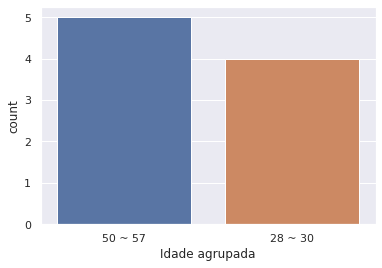

In [16]:
sns.countplot(x="Idade agrupada", data=df)
plt.savefig(path+"grouped_age.png")

Text(0.5, 1.0, 'Mental demand')

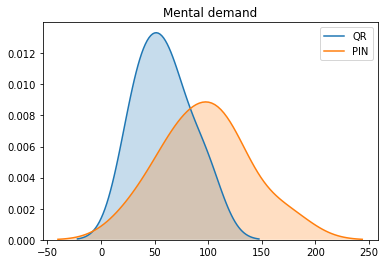

In [86]:
qrCol = "QR – Quanto tempo durou a tarefa?"#Quanta demanda mental foi necessária?"
pinCol = "PIN – Quanto tempo durou a tarefa?"#Quanta demanda mental foi necessária?"

q_mental = df[qrCol] 
p_mental = df[pinCol] 

sns.kdeplot(q_mental, shade=True, label="QR")
sns.kdeplot(p_mental, shade=True, label="PIN")
plt.title("Mental demand")

In [87]:
from scipy.stats import shapiro, wilcoxon
shapiro_test = shapiro(q_mental)
shapiro_test

(0.9684709310531616, 0.8813453316688538)

In [63]:
from numpy import mean
from numpy import std

In [64]:
mean(q_mental)

2.2222222222222223

In [65]:
std(q_mental)

1.8121673811444543

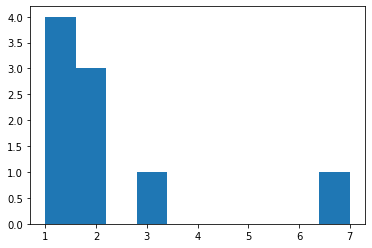

In [66]:
plt.hist(q_mental)
plt.show()

In [65]:
from statsmodels.graphics.gofplots import qqplot
qqplot(q_mental, line='s')
plt.show()

NameError: name 'q_mental' is not defined

In [77]:
stat, p = shapiro(q_mental)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.798, p=0.027
Sample does not look Gaussian (reject H0)


In [41]:
p

0.0007684778538532555

In [47]:
type(q_mental[0:5])

pandas.core.series.Series

In [83]:
wilcoxon(q_mental, p_mental)

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=4.5, pvalue=0.8539232992870668)

In [84]:
mean(q_mental)

2.2222222222222223

In [85]:
mean(p_mental)

2.3333333333333335

In [88]:
from sklearn.cluster import KMeans

In [89]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

ValueError: could not convert string to float: 'Ensino Superior completo'

In [100]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df.iloc[:, 1:])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 66.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 75.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 75.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 67.0
Best run was number 2


In [101]:
print(km.cluster_centroids_)

[['57' 'Feminino' 'Ensino Médio completo' '1' '1' '10' '1' '1' '60.5' '1'
  '1' '10' '1' '1' '70.12' '1' '1' '9' '1' '1' '4' '2' '7' '2' '3']
 ['53' 'Feminino' 'Ensino Superior completo' '2' '1' '10' '1' '1' '35.0'
  '8' '9' '1' '6' '3' '69.0' '1' '1' '2' '1' '1' '10' '10' '1' '9' '10']
 ['30' 'Masculino' 'Ensino Superior completo' '1' '1' '9' '1' '2' '47.0'
  '3' '3' '7' '2' '2' '105.0' '1' '1' '7' '1' '1' '3' '5' '6' '3' '3']
 ['28' 'Feminino' 'Ensino Superior completo' '1' '1' '10' '1' '1' '23.86'
  '1' '1' '10' '2' '2' '32.62' '1' '1' '10' '2' '1' '5' '10' '2' '5' '10']]


In [189]:
from scipy.stats import ttest_ind

In [2]:
def build_df_for_boxplot(v1, exp1, v2, exp2, ylabel):
    
    bxpda = {
    'Experimento': [],
    ylabel: []
    }

    for element in v1:
        bxpda['Experimento'].append(exp1)
        bxpda[ylabel].append(element)

    for element in v2:
        bxpda['Experimento'].append(exp2)
        bxpda[ylabel].append(element)

    return pd.DataFrame(bxpda)

In [3]:
def statistic_comparsion(series1, lbl1, series2, lbl2):
    
    _, p1 = shapiro(series1)
    p1str = get_appropriate_p_str(p1)
    p1_text = lbl1 + " | Shapiro-Wilk P-value: " + p1str
    
    _, p2 = shapiro(series2)
    p2str = get_appropriate_p_str(p2)
    p2_text = lbl2 + " | Shapiro-Wilk P-value: " + p2str


    alpha = 0.05
    if p1 > alpha:
        p1_text += ' | Gaussiana'
    else:
        p1_text += ' | Não-Gaussiana'
    
    if p2 > alpha:
        p2_text += ' | Gaussiana'
    else:
        p2_text += ' | Não-Gaussiana'
        
    p1_text += " (α = 0.05)"
    p2_text += " (α = 0.05)"
    
    
    if (p1 > alpha) and (p2 > alpha):  # both parametric  
        _, p = ttest_ind(series1, series2)
        pstr = get_appropriate_p_str(p)
        p3_text = "Welch P-value: " + pstr
    
    else:
        _, p = wilcoxon(series1, series2)
        pstr = get_appropriate_p_str(p)
        p3_text = "Wilcoxon P-value: " + pstr
    
    
    if p < alpha:
        p3_text += " | Hipótese nula rejeitada (α = 0.05)"
    else:
        p3_text += " | Hipótese nula não pôde ser rejeitada (α = 0.05)"
    
    return p1_text, p2_text, p3_text

In [11]:
def pltndata(question, exp1, exp2):
    path = "/home/colombelli/Documents/misc/ihc/trab/"
    
    col1 = exp1 + " – " + question
    col2 = exp2 + " – " + question
    
    var1 = df[col1] 
    var2 = df[col2] 
    
    labels = {
        "Q": "QR CODE",
        "P": "PIN CODE",
        "A": "APLICATIVO",
        "M": "MANUAL"
    }
    
    l1 = labels[col1[0]]
    l2 = labels[col2[0]]
    
    title = question + " (%s vs %s)" % (l1, l2)
    save_name = question[0:-1]+exp1+exp2
    
    t1, t2, t3 = statistic_comparsion(var1, l1, var2, l2)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5))
    fig.suptitle(title, fontsize=14)
    
    ylabel = 'Nota'
    if "tempo" in question:
        ylabel = 'Tempo (segundos)'
    
    bxdf = build_df_for_boxplot(var1, l1, var2, l2, ylabel)
    sns.set(style="whitegrid")  
    sns.boxplot(x="Experimento", y=ylabel, data=bxdf, ax=ax1)
    
    sns.kdeplot(var1, shade=True, label=l1, ax=ax2)
    sns.kdeplot(var2, shade=True, label=l2, ax=ax2)
    
    plt.xlabel('''

    %s
    %s

%s''' % (t1, t2, t3))
    
    plt.savefig(path+save_name+'.png', bbox_inches = "tight")
    plt.show()
    
    return var1, var2

In [5]:
def get_appropriate_p_str(p):
    
    p_check = '%.3f' % p
    if p_check != "0.000":
        return p_check
    
    else:
        p_conv = '%f' % p
        new_p = ""
        for c in p_conv:
            if (c != '0') and (c != '.'):
                new_p += c
                return new_p
            else:
                new_p += c
        
        return new_p

In [6]:
q1 = "Quanta demanda mental foi necessária?"
q2 = "Quanta demanda física foi necessária?"
q3 = "Quão satisfeito tu te sentiste com a tua performance?"
q4 = "Quão difícil foi a tarefa?"
q5 = "O quão frustrante foi a tarefa?"
qtempo = "Quanto tempo durou a tarefa?"

app = "APP"
manual = "MAN"
qr = "QR"
pin = "PIN"

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


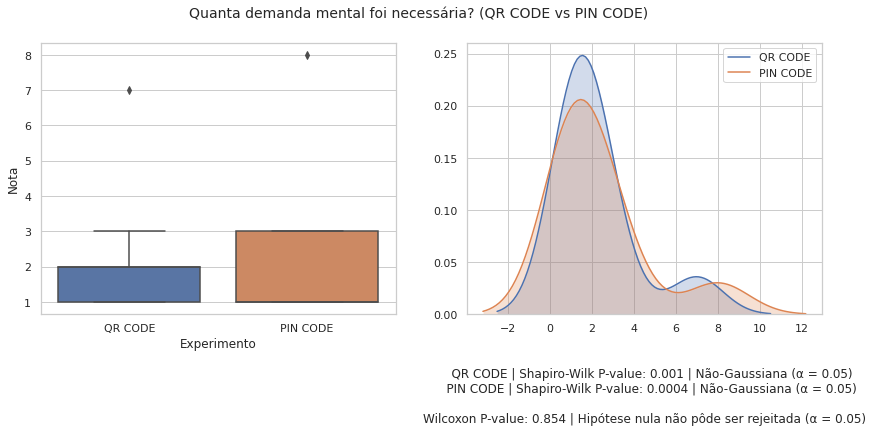

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


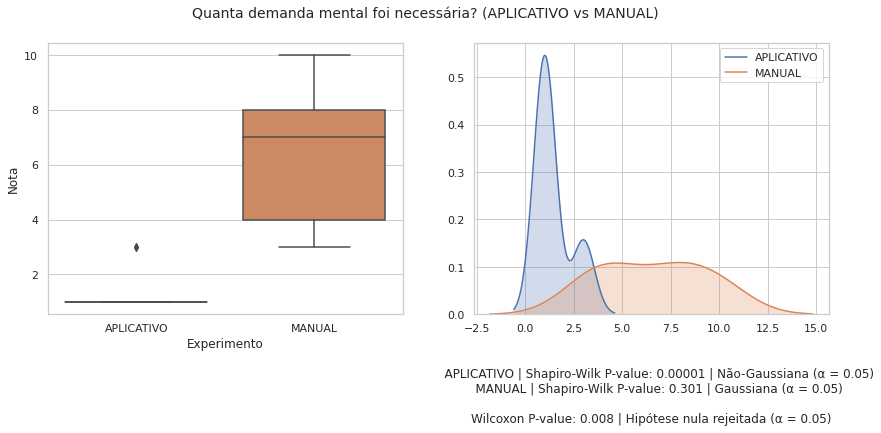

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


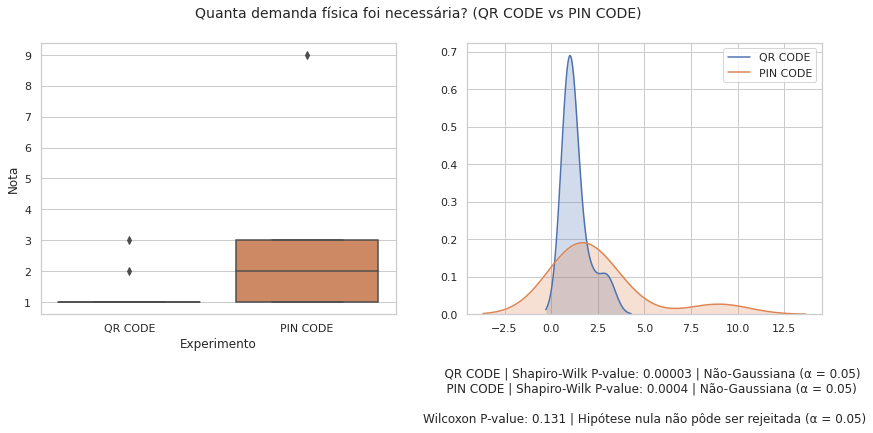

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/colombelli/.local/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


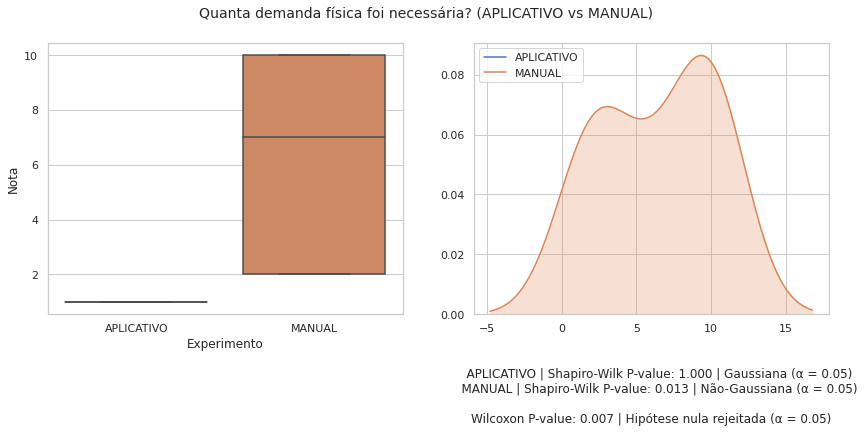

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


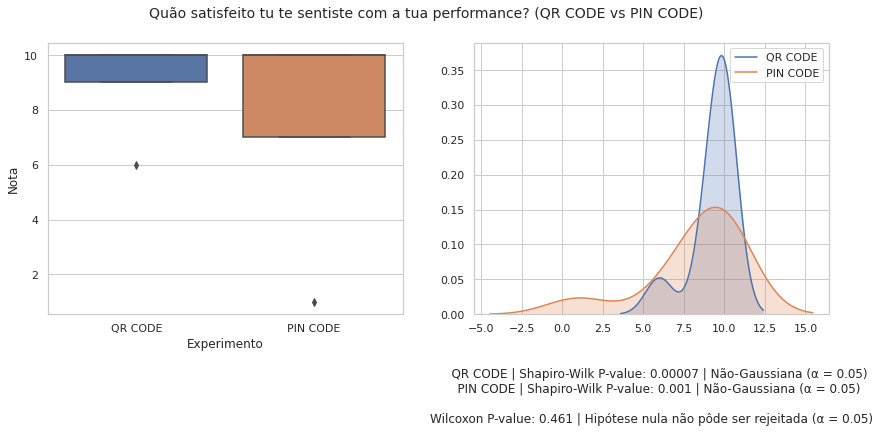

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


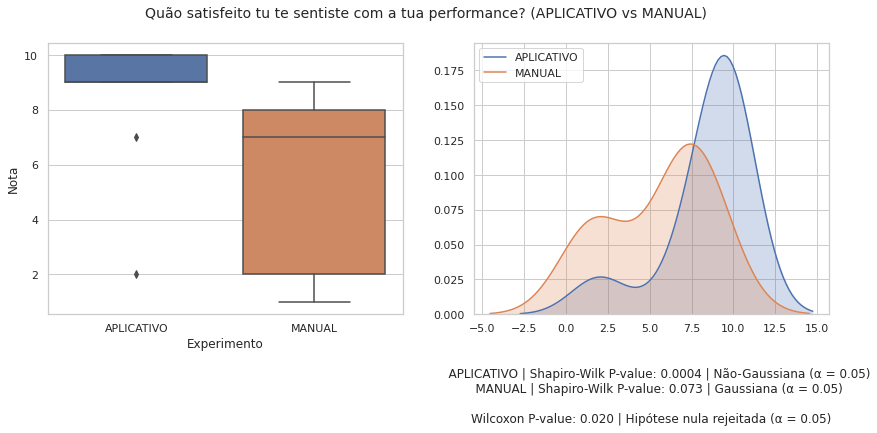

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


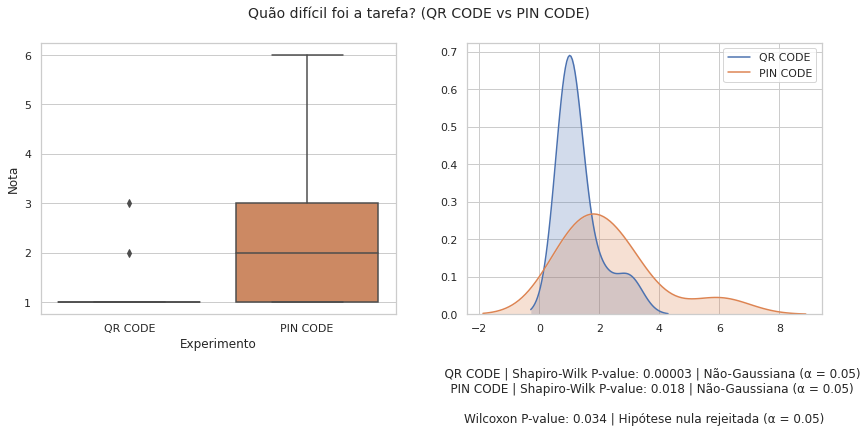

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


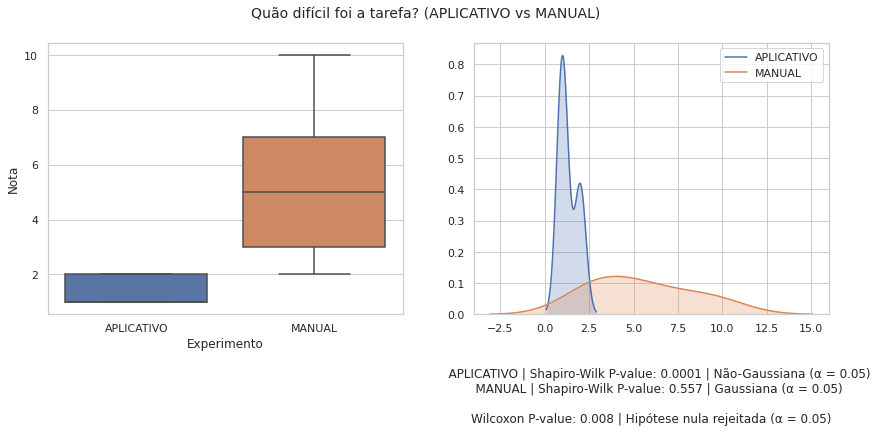

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


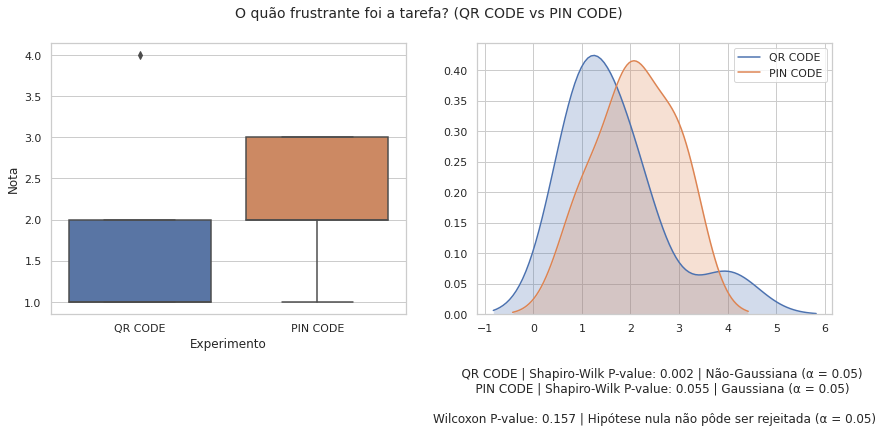

/home/colombelli/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:2879: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


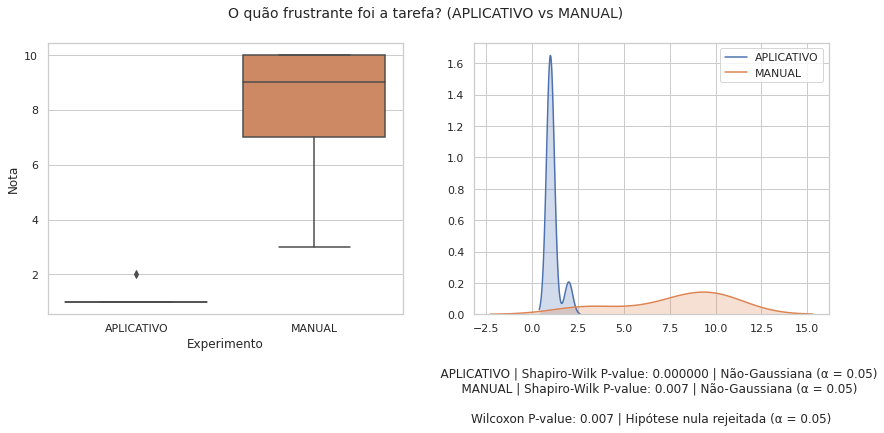

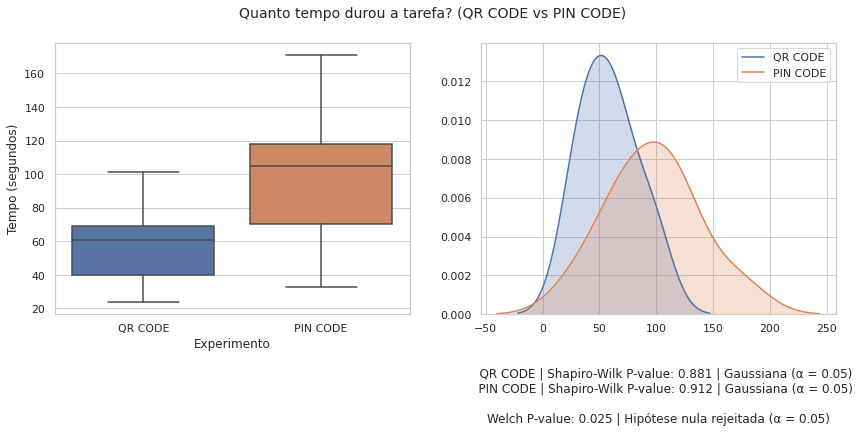

(0     23.86
 1     69.00
 2     35.00
 3     40.00
 4     47.00
 5    101.55
 6     87.86
 7     62.30
 8     60.50
 Name: QR – Quanto tempo durou a tarefa?, dtype: float64,
 0     32.62
 1    124.00
 2     69.00
 3    118.00
 4    105.00
 5    171.06
 6    107.45
 7     79.50
 8     70.12
 Name: PIN – Quanto tempo durou a tarefa?, dtype: float64)

In [12]:
qs = [q1,q2,q3,q4,q5]

for q in qs:
    pltndata(q, qr, pin)
    pltndata(q, app, manual)
    
pltndata(qtempo, qr, pin)

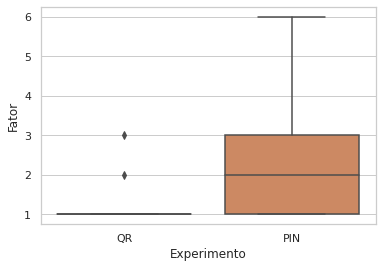

In [155]:
bxpda = {
    'Experimento': [],
    'Fator': []
}

for element in v1:
    bxpda['Experimento'].append("QR")
    bxpda['Fator'].append(element)
    
for element in v2:
    bxpda['Experimento'].append("PIN")
    bxpda['Fator'].append(element)
    

    
sns.set(style="whitegrid")  
ax = sns.boxplot(x="Experimento", y="Fator", data=pd.DataFrame(bxpda))